In [4]:
import numpy as np
import matplotlib.pyplot as plt
import linear_regression as lr # This is my linear regression module
import figures
from scipy.stats import stats
import data

# My Linear Regression Python Module

## Intro
The SciPy library is the most widely used scientific library for the Python  programming language. It's statistic package has a function for performing linear regression, *linregress*. To perform linear regression with linregress, you simply need to create two lists. If you have a set of measurements of *(x,y)* values, you simply need to create a list to store your *x* values and a corresponding list of *y* values.

For example, you have the following data points: *(2,4),(6,8),* and *(10,12)*. Here's how to perform linear regression using the least squared method with *linregress*.

In [5]:
x = [2,6,10]
y = [4,9,12.5]
stats.linregress(x,y)

LinregressResult(slope=1.0625, intercept=2.125, rvalue=0.99484975116710983, pvalue=0.064639173827150634, stderr=0.10825317547305446)

So *linregress* returns the best-fit slope, the best fit intercept, the correlation coefficient (r), the p-value, and standard error of the best fit slope. 

There are a few features that *lingress* does not provide that was relevant to data analysis for experiments in this course. It isn't possible to force the  best-fit slope for any data set to go through the origin. *linregress* also doesn't provide the standard error of the y-intercept. So I wanted to recreate a module that provides the same information as *linregress*, with some additional features. 

## Regression Equations

For this course, we were assigned the book "Practical Physics" by G.L. Squirres. So I wanted use the linear regression equations from the course textbook to build my module. All the equations listed in this notebook are from "Practical Physics", pages 31-32.

For a set of n datapoints, $x_i$ stands for the i-th value of x, and $y_i$ stands for the i-th value of $y$. $\bar{x}$ stands fr the mea value of x and $\bar{y}$ for the mean value of y. 

### The Best Fit Slope
From pg 39 of Squirres, the equation for the best fit slope, m, is

$$ m = \frac{\sum{(x_i - \bar{x})y_i}}{\sum{(x_i-\bar{x})^2}}$$

Here's a simple test that shows that, at least for the data set I used below, *linregress*, my module, and the equation above all arrive at the same best-fit-slope.

So let's test the set of data points $(x,y)=(0,3),(3,5),(6,11),(11,24)$. I will stick with that data set for all of my functions that have a counterpart in *linregress*. And I will use the data set $(x_0,y_0) = (1,1),(3,5),(5,12)$ for functions I created that have no counter part in *linregresss*.

In [6]:
x = [0,3,6,11] # The mean value of x is (0+3+6+11)/4 = 20/4=5
y = [1,5,11,24]
x_0 = [1,3,5]
y_0 = [1,5,12]

### The numerator of m...one sum at a time.
sum_list_top = [] 
sum_list_top.append((0-5)*1) 
sum_list_top.append((3-5)*5)  
sum_list_top.append((6-5)*11) 
sum_list_top.append((11-5)*24) 
sum_list_top = np.array(sum_list_top)
sum_top = sum_list_top.sum() 

### Next, I'll calculate the denominator... one sum at a time.
sum_list_bottom = [] 
sum_list_bottom.append((0-5)**2) 
sum_list_bottom.append((3-5)**2) 
sum_list_bottom.append((6-5)**2) 
sum_list_bottom.append((11-5)**2) 
sum_list_bottom = np.array(sum_list_bottom)
sum_bottom = sum_list_bottom.sum() 

### Now I'll calculate the slope
slope_from_scratch = sum_top/sum_bottom
linregress_slope = stats.linregress(x,y)[0]   
slope_from_my_module = lr.slope(x,y) # I imported my module as lr so that I wouldn't have to 
                                     # keep typing linear_regression over and over again.
    
print('best fit slope calculated "from scratch" = {:.10e}'.format(slope_from_scratch))
print('best fit slope from linregress = {:.10e}'.format(linregress_slope))
print('best fit slope from my module = {:.10e}'.format(slope_from_my_module))


best fit slope calculated "from scratch" = 2.1212121212e+00
best fit slope from linregress = 2.1212121212e+00
best fit slope from my module = 2.1212121212e+00


Here's my module's code for calculating the best fit slope:
```python
def slope(x,y,through_origin = False):
    x = np.array(x)
    y = np.array(y)
    if through_origin == False:
        x = np.array(x)
        y = np.array(y)
        return ((x-x.mean())*y).sum()/((x-x.mean())**2).sum()
    else:
        return ((x*y).sum())/(x**2).sum()
```
One option that I added, which is not available with linregress, is to force the best fit line to go through the origin.

#### The slope for the best fit line through the origin is
$$m = \frac{\sum x_iy_i}{\sum x_i^2}$$

Since *linregress* doesn't have this feature, I will just compare the error I recieve from my own module with a calculation 'from scratch' using the equation above.

In [7]:
print(' x_0 = ' + str(x_0))
print(' y_0 = ' +str(y_0))

print("Best-Fit Slope Numerator Calculation: " + "1*1 + 3*5 + 5*12 = " + str(1*1+3*5+5*12))
print("Best-Slope Denominator Calcuation: " + "1*1 + 3*3 + 5*5 = " + str(1*1+3*3+5*5) + '\n')
print("Best-Fit Slope Calculated 'From Scratch =  " + "76/35 = "  + str(76/35))
print("Best-Fit Slope From My Module = {} ".format(lr.slope(x_0,y_0,through_origin = True)))
print("PERFECT AGREEMENT")

 x_0 = [1, 3, 5]
 y_0 = [1, 5, 12]
Best-Fit Slope Numerator Calculation: 1*1 + 3*5 + 5*12 = 76
Best-Slope Denominator Calcuation: 1*1 + 3*3 + 5*5 = 35

Best-Fit Slope Calculated 'From Scratch =  76/35 = 2.1714285714285713
Best-Fit Slope From My Module = 2.1714285714285713 
PERFECT AGREEMENT


### Best-Fit-Intercept
The y-intercept of the line of best fit, c, is
$$c = \bar{y} - m\cdot{\bar{x}}$$
with $m$ being the slope of the best fit line.

Here is the function I created to calculate the intercept:
```python
def intercept(x,y,through_origin = False):
    if through_origin == False:
        x = np.array(x)
        y = np.array(y)
        return y.mean() - slope(x,y)*x.mean()
    else:
        return 0.0
```

I will use the same dataset that I used to test my slope function to test my intercept function.

In [8]:
# Data set: (0,3),(3,5),(6,11),(11,24)
# Slope of best fit line: 2.1212121212

print('x = ' + str(x))
print('y = ' + str(y))

x = [0, 3, 6, 11]
y = [1, 5, 11, 24]


The average value of x is $(0+3+6+11)/4 = 5$

The average value of y is $(1+5+11+24)/4 = 41/4$

The slope is $2.1212121212$

In [9]:
intercept_from_scratch = (41/4) - 2.1212121212*5
intercept_from_my_module = lr.intercept(x,y)
linregress_intercept = stats.linregress(x,y)[1]
print('best fit intercept calculated "from scratch" = {:.8e}'.format(intercept_from_scratch))
print('best fit intercept from linregress = {:.8e}'.format(linregress_intercept))
print('best fit intercept from my module = {:.8e}'.format(intercept_from_my_module))
print("THEY ALL AGREE")

best fit intercept calculated "from scratch" = -3.56060606e-01
best fit intercept from linregress = -3.56060606e-01
best fit intercept from my module = -3.56060606e-01
THEY ALL AGREE


I also added a plotting function to my module to make it easy to plot a set of data points with a line of best fit.
Here's the code:
```python
def plot_graph(x,y, through_origin = False):
    plt.plot(x, y, 'o', label='original data')
    if through_origin == False:
        plt.plot(x, intercept(x,y) + slope(x,y)*x, 'r', label='fitted line')
    else:
        plt.plot(x,slope(x,y)*x, 'r', label = 'fitted line')
    
```

Here's a plot of the data set I used to test my slope and intercept functions

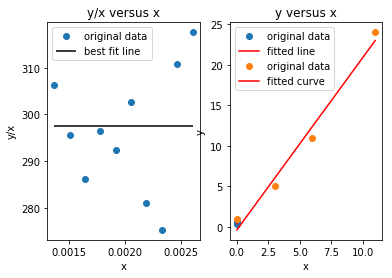

In [10]:
lr.plot_graph(x,y)
plt.legend()
plt.show()

### Standard Error of Slope
The standard error of the best fit line, $\Delta m$, is given by
$${\left( {\Delta m} \right)^2} = \frac{1}{{\sum {{{\left( {{x_i} - \bar x} \right)}^2}} }}\frac{{\sum {{{\left( {{y_i} - m{x_i} - c} \right)}^2}} }}{{n - 2}}$$


Here's my module's function for calculating the standard error
```python
def slope_error(x,y,through_origin = False):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    if through_origin == False:
        residuals_squared = (y - slope(x,y)*x - intercept(x,y))**2
        residuals_squared_sum = residuals_squared.sum()
        D = ((x-x.mean())**2).sum()
        return np.sqrt((1/(n-2))*residuals_squared_sum/D)
    else:
        residuals_squared = (y - slope(x,y,True)*x)**2
        return np.sqrt(residuals_squared.sum()/((n-1)*(x**2).sum()))
```

I will now use the previous values calculated for the data set (x,y) and the general equation for the best fit line to test my module. 

In [11]:
c = lr.intercept(x,y)
m = lr.slope(x,y)
denominator_first_factor = 25+4+1+36
num_second_factor = (1-m*0-c)**2+(5-m*3-c)**2 + (11-m*6-c)**2 + (24-m*11-c)**2
slope_error_squared_from_scratch = num_second_factor/(denominator_first_factor*2)

slope_error_from_scratch = np.sqrt(slope_error_squared_from_scratch)
linregress_slope_error = stats.linregress(x,y)[4]
slope_error_from_my_module = lr.slope_error(x,y)

print('x = ' + str(x))
print('y = ' + str(y))
print('m = 2.1212121212e+00')
print('c = -3.56060606e-01')
print('mean value of x = 5')
print('Calculation, from scratch of the standard error of the slope squared:\n' 
      '     Denominator of first fact = ' + str(denominator_first_factor) +'\n'
      '     Numerator of second factor = ' + str(num_second_factor) + '\n' 
      '     Denominator of second factor = n - 2 = 4-2 = 2\n '
      '     \n '
      '     slope error squared = (1/66*2)*5.7803030303 = ' + str(slope_error_squared_from_scratch) +'\n \n')

print('best fit slope standard error calculated "from scratch" = {:.8}'.format(slope_error_from_scratch))
print('best fit slope standard error from linregress = {:.8e}'.format(linregress_slope_error))
print('best fit slope standard error from my module = {:.8e}'.format(slope_error_from_my_module))


x = [0, 3, 6, 11]
y = [1, 5, 11, 24]
m = 2.1212121212e+00
c = -3.56060606e-01
mean value of x = 5
Calculation, from scratch of the standard error of the slope squared:
     Denominator of first fact = 66
     Numerator of second factor = 5.7803030303
     Denominator of second factor = n - 2 = 4-2 = 2
      
      slope error squared = (1/66*2)*5.7803030303 = 0.043790174472
 

best fit slope standard error calculated "from scratch" = 0.20926102
best fit slope standard error from linregress = 2.09261020e-01
best fit slope standard error from my module = 2.09261020e-01


#### Standard error of the slope of the best fit line through the origin

If the line is forced to go through the origin, the formula for the slope of the best fit line is given by
$$(\Delta m)^2 = \frac{1}{\sum x_i^2}\frac{\sum d_i^2}{n-1}$$

*linregress* doesn't provide the option to force the best fit line through the origin, so I can only test my module with a "from scratch" calculation. I will again use the $(x_0,y_0$) data set, and the value I calculated for the slope of the best fit line through the origin.

In [14]:
print('x_0 = ' + str(x_0) +'\n'
      'y_0 = ' + str(x_0) + '\n')


x_0 = [1, 3, 5]
y_0 = [1, 3, 5]



### Special Graphs for Regression Equations that Cross the Origin
In our magnetic, we were trying to figure out the magnetic moment for an electric.. Our line seemed to fit the data incredibly closely. The model equation was of the form y = mx. I was very surprised at how close our data points were to forming a perfectly straight line, since our measurements involved timing the rotational period of a rotating objection. It was difficult to tell when to start and stop our timer, so I expected it would be difficult to get a close fit. In cases when your model is equivalent to $y=mx$, a best fit graph isn't the only way to be able to visualize the linearity (or lack thereof) of your data. 

For example, instead of plotting the best fit line y = mx, it is possible to plot y-x versus x. 

I created a function *plot_y_minus_x* to do just that. It was just took a simple tweak of my *plot_graph* function. I also had to make sure that if *0* was an x coordinate for one of the points, that point would be removed from the data set, since dividing by zero is not allowed.

```python
def plot_y_over_x(x,y):
    x = np.array(x)
    y = np.array(y) 
    plt.plot(x[x!=0],y[x!=0]/x[x!=0],'o',label = 'original data')
    plt.hlines(slope(x,y,True), x.min(), x.max(), colors='k', linestyles='solid', label = 'best fit line')
    ```
        


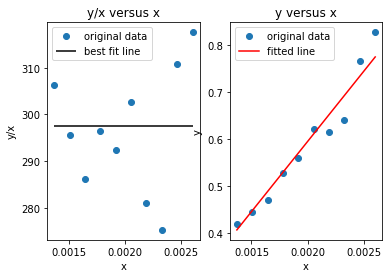

In [10]:
data.fig

The horizontal line in the graph on the left is the slope of the line in the second graph. Just plotting y-versus-x for this dataset, it looks likes our data-set matched the best fit line very closely. But y/x is much more sensitive to tiny deviations than y-versus x.

### Standard Intercept Error
*linregress* does not provide the standard error of the y-intercept. 'Pratical Physics', however, derives an equation for the standard error of the intercept, so I included it in my module.

The standard error of the intercept, $\Delta c$ is defined by
$$(\Delta c)^2 = \left(\frac{1}{n} + \frac{\bar{x}^2}{\sum{(x_i - \bar{x})^2}}\right)\cdot \frac{\sum{(y_i - m \cdot x_i)^2}}{n-2}$$

My modules *intercept_error* function:
```python
def intercept_error(x,y,through_origin = False):
    if through_origin == False:
        x = np.array(x)
        y = np.array(y)
        n = len(x)
        D = ((x-x.mean())**2).sum()
        residuals_squared = (y - slope(x,y)*x - intercept(x,y))**2
        return np.sqrt(((1/n) + (x.mean()**2)/D)
                       *residuals_squared.sum()/(n-2))
    else:
        return 0.0
        ````

In [9]:
x_0 = np.array([1,3,5])
y_0 = np.array([1,5,12])


In [98]:
slope_error(x,y)

0.20926101995353233